<a href="https://colab.research.google.com/github/Leonardodarienzo/Pandas/blob/main/Pandas_e_Matplotlib(VerificaFinale).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_csv('https://github.com/italia/covid19-opendata-vaccini/blob/master/dati/somministrazioni-vaccini-latest.csv?raw=true')
df1

In [ ]:
dfVacc = df1.groupby(['area'], as_index=False)['d1'].sum()
dfVacc

In [ ]:
df2 = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/platea.csv')
df2

In [ ]:
dfTotale = df2.groupby(['area'], as_index=False).sum()
dfTotale

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
labels = dfVacc['area']
dati = dfVacc['d1']

fig, ax = plt.subplots(figsize=(15,8))
ax.bar(labels, dati, label='totale vaccinati in ogni regione')

In [ ]:
labels = dfVacc['area']
dati = dfVacc['d1']

fig, ax = plt.subplots(figsize=(15,8))
ax.bar(labels, dati, label='totale vaccinati in ogni regione')

ax.set_ylabel('abitanti (in milioni)')
ax.set_title('popolazione vaccinata nelle varie regioni')
ax.set_xticklabels(labels) 
ax.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax.barh(labels, dati, label='totale vaccinati in ogni regione')

In [ ]:
plt.figure(figsize=(16, 8))
plt.pie(dati, labels=labels, autopct='%1.1f%%')
plt.show()

In [ ]:
labels = dfTotale['area']
vaccinati = dfVacc['d1']
popolazione = dfTotale['totale_popolazione']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,8))
ax.bar(x - width/2, vaccinati, width, label='vaccinato')
ax.bar(x + width/2, popolazione, width, label='popolazione')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('abitanti')
ax.set_xlabel('regioni')
ax.set_title('vaccinati sul totale della popolazione')
ax.set_xticks(x)
ax.set_xticklabels(labels) 
ax.legend()

fig.tight_layout()

plt.show()

In [ ]:
labels = dfTotale['area']
dati = dfVacc['d1']/dfTotale['totale_popolazione']*100
dati.sort_values(ascending=False, inplace=True)

fig, ax = plt.subplots(figsize=(15,8))
ax.bar(labels, dati, label='percentuale di vaccinati')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('percentuale')
ax.set_xlabel('regioni')
ax.set_title('percentuale di vaccinati sul totale della popolazione')
ax.set_xticks(x)
ax.set_xticklabels(labels) 
ax.legend()

fig.tight_layout()

plt.show()

**Esercizi**

1. il numero di casi totali in Lombardia

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province-20221119.csv')
df

In [ ]:
df[df.denominazione_regione=='Lombardia'][["totale_casi"]].sum()

2. il numero di casi totali in ogni regione. Ordinare in ordine decrescente in base al numero di casi

In [ ]:
dfgroup2=df.groupby('denominazione_regione', as_index= False).sum()
dfgroup2

3. le regioni che hanno più di un milione di casi

In [ ]:
dfgroup2[dfgroup2.totale_casi>1000000]

4. il numero di casi in Italia

In [ ]:
df[df.stato=='ITA'][["totale_casi"]].sum()

5. la percentuale di casi in ogni regione rispetto al totale dei casi

In [ ]:
dfgroup = df.groupby("denominazione_regione")[["totale_casi"]].sum()
dfgroup / df["totale_casi"] * 100

**Esercizi 2**

1. un grafico a barre verticali per la richiesta numero 2

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
labels = dfgroup2['denominazione_regione']
dati2 = dfgroup2['totale_casi']

fig, ax = plt.subplots(figsize=(40,14))
ax.bar(labels, dati2, label='totale casi in ogni regione')

ax.set_ylabel('abitanti (in milioni)')
ax.set_title('casi in tutte le varie regioni')
ax.set_xticklabels(labels) 
ax.legend()

2. un grafico a barre orizzontali per la richiesta numero 2

<BarContainer object of 21 artists>

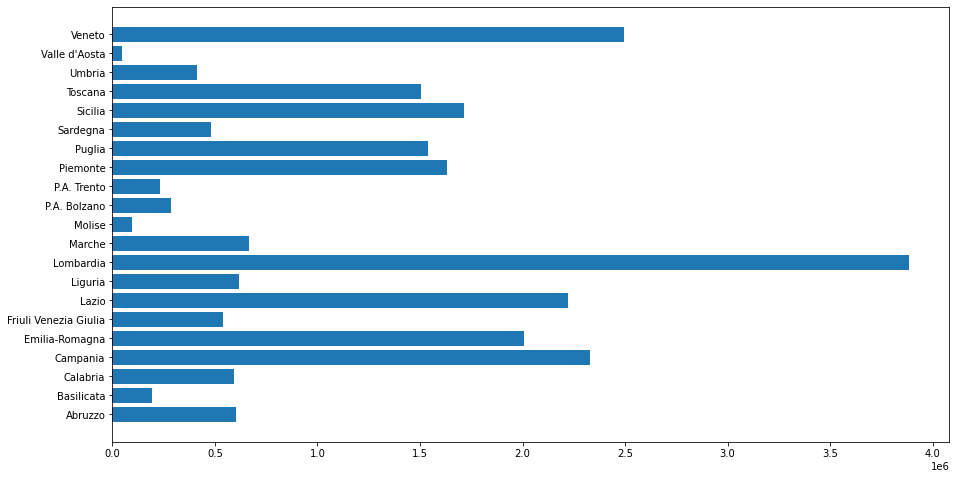

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax.barh(labels, dati2, label='totale casi in ogni regione')

3. un grafico a torta per la richiesta numero 5

In [ ]:
plt.figure(figsize=(22, 10))
plt.pie(dati2, labels=labels, autopct='%1.1f%%')
plt.show()